In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/datasets_88705_204267_Real estate.csv")

In [ ]:
dataset.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3


In [ ]:
dataset.drop(columns=["No","X1 transaction date","X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores"],inplace=True)

In [ ]:
dataset.head(5)

,X5 latitude,X6 longitude,Y house price of unit area
0,24.98298,121.54024,37.9
1,24.98034,121.53951,42.2
2,24.98746,121.54391,47.3
3,24.98746,121.54391,54.8
4,24.97937,121.54245,43.1


In [ ]:
dataset.shape

(414, 3)

In [ ]:
dataset.isnull().sum()

,0
X5 latitude,0
X6 longitude,0
Y house price of unit area,0


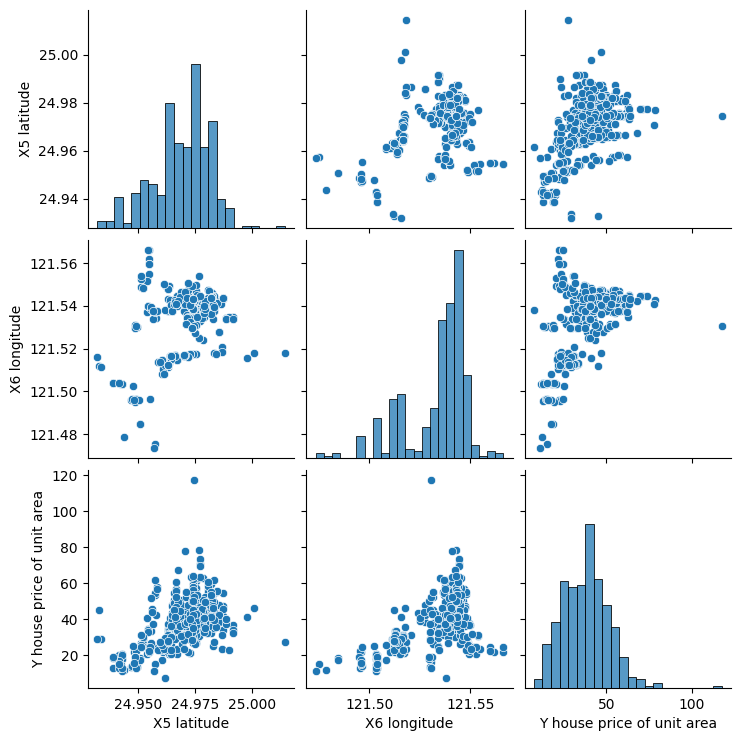

In [ ]:
sns.pairplot(data=dataset)
plt.show()

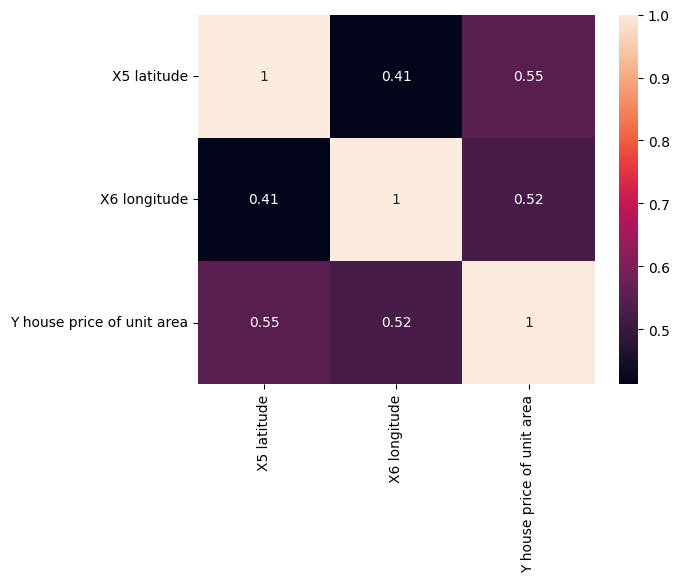

In [ ]:
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [ ]:
x= dataset.iloc[:,:-1]
y=dataset["Y house price of unit area"]




In [ ]:
x

,X5 latitude,X6 longitude
0,24.98298,121.54024
1,24.98034,121.53951
2,24.98746,121.54391
3,24.98746,121.54391
4,24.97937,121.54245
...,...,...
409,24.94155,121.50381
410,24.97433,121.54310
411,24.97923,121.53986
412,24.96674,121.54067


In [ ]:
y

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


In [ ]:
dataset.shape

(414, 3)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=200)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

**Multiple linear regression**

*   y=m1x1 + m2x2 + c




In [ ]:
lr.score(x_test,y_test)

0.43647933258377647

In [ ]:
lr.coef_

array([450.57486589, 299.14908972])

In [ ]:
lr.intercept_

np.float64(-47568.995737343634)

In [ ]:
x.columns

Index(['X5 latitude', 'X6 longitude'], dtype='object')

In [ ]:
lr.predict(x_test)

array([44.43992947, 30.91435395, 17.75353317, 44.51112111, 37.96661913,
       33.74541083, 29.11864111, 42.12370048, 38.60632486, 42.12318964,
       33.57685065, 41.75998618, 39.57822193, 31.70637355, 39.0473371 ,
       34.66056238, 45.77827367, 45.77827367, 39.55223588, 34.8655388 ,
       39.17058388, 43.3173794 , 39.04534853, 45.16140789, 15.54980305,
       38.06372099, 39.55223588, 38.77230457, 39.83427683, 17.31711573,
       38.8611687 , 46.90048252, 27.77125866, 33.88751864, 44.74398783,
       44.32125825, 40.25465184, 33.95880259, 39.55223588, 33.24277381,
       29.15560897, 18.37026536, 43.3173794 , 39.13892931, 39.73267297,
       53.9967452 , 41.76867196, 45.16140789, 42.09918367, 44.57083285,
       17.38749756, 27.58303614, 27.51459084, 45.16140789, 16.79396756,
       17.75353317, 46.90048252, 41.28173289, 47.86215478, 32.66951079,
       39.28595616, 43.3173794 , 39.78679448, 45.92329794, 38.77230457,
       37.46697785, 39.17058388, 46.90048252, 34.90102942, 28.22

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   X5 latitude                 414 non-null    float64
 1   X6 longitude                414 non-null    float64
 2   Y house price of unit area  414 non-null    float64
dtypes: float64(3)
memory usage: 9.8 KB


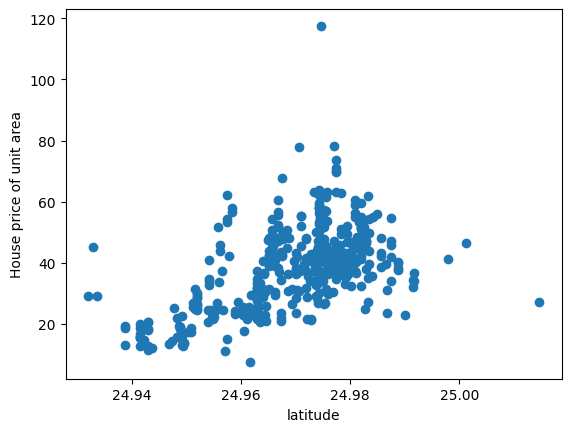

In [ ]:
plt.scatter(dataset["X5 latitude"],dataset["Y house price of unit area"])

plt.xlabel("latitude")
plt.ylabel("House price of unit area")
plt.show()



In [ ]:
fig=px.scatter_3d(dataset,x='X5 latitude',y='X4 number of convenience stores',z='Y house price of unit area')
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['X5 latitude', 'X6 longitude', 'Y house price of unit area'] but received: X4 number of convenience stores